# Project: Investigate the Dataset of European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#appendices">Appendices</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will investigate the [European Soccer Database](https://www.kaggle.com/hugomathien/soccer), which is one of the dataset choices offered in Data Analyst Nanodegree Program, and share the findings of analysis in this report (a Jupyter Notebook). 

As its name suggests, this dataset is all about historical records of European soccer, and covers most if not all aspects of soccer games, ranging from players and their attributes, team and their attributes, to detailed soccer match records of every game taken place during season from 2008 to 2016, and betting odds of every game proposed by several bookmakers worldwide. Whether you are a seasoned soccer fan, or just curious about the contents of the data files, there is a good chance that you can find something enlightening in this dataset.

For this dataset we will focus on questions that do not require deep knowledge of soccer games, hoping to make the findings intuitive and can be understood by using merely common sense. And fortunately this dataset provided us with materials to make this happen. The question we will try to explore would revolve around gambling : we know there are +25,000 matches in the dataset, but could we find some practicable clues about how to place a nice bet to let us win more times than we lose?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Check version of modules which will be used in this project
# https://unix.stackexchange.com/questions/47918/how-to-grep-a-specific-line-and-the-first-line-of-a-file
# https://www.setouchino.cloud/blogs/108
# https://stackoverflow.com/questions/61325817/differences-between-matplotlib-and-matplotlib-base
!conda list | awk 'NR <= 3 || /matplotlib/ || /numpy/ || /pandas/ || /sqlite/'

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
matplotlib                3.1.3                    py37_0    conda-forge
matplotlib-base           3.1.3            py37h250f245_0    conda-forge
numpy                     1.20.3           py37h038b26d_1    conda-forge
pandas                    1.2.4            py37h219a48f_0    conda-forge
sqlite                    3.34.0               h74cdb3f_0    conda-forge


In [3]:
# Check version of Jupyter components
!jupyter --version

jupyter core     : 4.7.1
jupyter-notebook : 6.2.0
qtconsole        : not installed
ipython          : 7.20.0
ipykernel        : 5.1.4
jupyter client   : 6.1.11
jupyter lab      : 3.0.7
nbconvert        : 6.0.7
ipywidgets       : 7.6.3
nbformat         : 5.1.2
traitlets        : 5.0.5


In [4]:
# Download dataset for this project
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite

--2021-06-30 15:48:51--  https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.226.23.18, 13.226.23.155, 13.226.23.55, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.226.23.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313090048 (299M)
Saving to: ‘database.sqlite’

database.sqlite     100%[===================>] 298.59M  50.8MB/s    in 6.0s    

2021-06-30 15:48:57 (49.6 MB/s) - ‘database.sqlite’ saved [313090048/313090048]



In [5]:
# Open connections to SQLite database
# https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html
# https://towardsdatascience.com/python-pandas-and-sqlite-a0e2c052456f
# https://qiita.com/saira/items/e08c8849cea6c3b5eb0c
conn = sql.connect("database.sqlite")
cur = conn.cursor()

<a id='wrangling'></a>
## Data Wrangling
Even though we will focus mainly on match records, it is still a worth doing to perform a thorough check of raw data we get. We will execute a detailed check on all data (coming from SQLite tables) loaded into Pandas DataFrames, and see their contents as well as problems coming with them.
### General Properties

Load data in SQLite tables into Pandas DataFrames.

In [6]:
df_country     = pd.read_sql_query("SELECT * from Country", conn)
df_league      = pd.read_sql_query("SELECT * from League", conn)
df_match       = pd.read_sql_query("SELECT * from Match", conn)
df_player      = pd.read_sql_query("SELECT * from Player", conn)
df_player_attr = pd.read_sql_query("SELECT * from Player_Attributes", conn)
df_team        = pd.read_sql_query("SELECT * from Team", conn)
df_team_attr   = pd.read_sql_query("SELECT * from Team_Attributes", conn)

# "sqlite_sequence" is an internal table for tracking ROWID values of tables which contain AUTOINCREMENT columns,
# which means we can safely skip this table when loading data
# https://www.sqlite.org/autoinc.html
#df_sqlite_seq = pd.read_sql_query("SELECT * from sqlite_sequence", conn)

Print out first 3 lines of each DataFrame for a brief check.

In [7]:
# In Jupyter Notebook code cells, you can show a single DataFrame as a table by calling its name directly
# To display more than 2 DataFrames in the same cell, use display() function to exhibit all DataFrames at once
# https://qiita.com/hrsma2i/items/3970410d289542c5386c
# https://punhundon-lifeshift.com/print_display_pprint
# https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/
# https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
# https://blog.softhints.com/display-two-pandas-dataframes-side-by-side-jupyter-notebook/

display(df_country.head(3))
display(df_league.head(3))
display(df_match.head(3))
display(df_player.head(3))
display(df_player_attr.head(3))
display(df_team.head(3))
display(df_team_attr.head(3))

,id,name
0,1,Belgium
1,1729,England
2,4769,France


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


Verify the number of rows and columns in each DataFrame.

In [8]:
print(df_country.shape)
print(df_league.shape)
print(df_match.shape)
print(df_player.shape)
print(df_player_attr.shape)
print(df_team.shape)
print(df_team_attr.shape)

(11, 2)
(11, 3)
(25979, 115)
(11060, 7)
(183978, 42)
(299, 5)
(1458, 25)


Duplicate data entry detection for each DataFrame.

In [9]:
# No duplicate data entry detected if the command returns "True"
print(df_country.shape == df_country.drop_duplicates().shape)
print(df_league.shape == df_league.drop_duplicates().shape)
print(df_match.shape == df_match.drop_duplicates().shape)
print(df_player.shape == df_player.drop_duplicates().shape)
print(df_player_attr.shape == df_player_attr.drop_duplicates().shape)
print(df_team.shape == df_team.drop_duplicates().shape)
print(df_team_attr.shape == df_team_attr.drop_duplicates().shape)

True
True
True
True
True
True
True


Perform column datatype comparisons of imported DataFrames and original SQLite tables. Before we begin, we will store SQLite table datatype info to a dictionary and use it in the comparison process.<br>
Columns which contain NULL values will also be checked in this phase.

In [10]:
# (Optional) Use fancy way to display SQLite table datatype info as Pandas DataFrames, programmatically & beautifully
# You can also use Command Line Shell For SQLite or DB Browser for SQLite to do the same task manually if you prefer

# We will use a dictionary to store SQLite table datatype info and use it for lookup later
keys = ['country', 'league', 'match', 'player', 'player_attr', 'team', 'team_attr']
values = []

# https://database.guide/2-ways-to-list-tables-in-sqlite-database/
cur.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%' ORDER BY name;")
name_sql_table = cur.fetchall()
# Because cur.fetchall() returns a list of tuples, we'll have access item inside to remove unwanted symbols
# https://stackoverflow.com/questions/47716237/python-list-how-to-remove-parenthesis-quotes-and-commas-in-my-list
name_sql_table = [i[0] for i in name_sql_table]

# Fetch datatype info from each SQLite table and save it to a Pandas DataFrame
# https://www.sqlitetutorial.net/sqlite-tutorial/sqlite-describe-table/
# https://stackoverflow.com/questions/7831371/is-there-a-way-to-get-a-list-of-column-names-in-sqlite
for i in range(len(keys)):
    cur.execute("PRAGMA table_info({});".format(name_sql_table[i]))
    # https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
    values.append(pd.DataFrame(cur.fetchall(), columns = list(map(lambda x: x[0], cur.description))))

dtype_sql_table = dict(zip(keys, values))

Feel free to inspect and adjust Pandas display options below to suit your needs before proceeding with dtype checking, since some of the SQLite tables contain many columns and may produce lengthy outputs (we are going to display all of them anyway).

In [11]:
# Default limits when displaying DataFrame.info()
# Can be overrided by setting arguments verbose=True and show_counts=True
#print(pd.options.display.max_info_columns) # 100
#print(pd.options.display.max_info_rows) # 1690785

# Default limits when displaying DataFrame itself
#print(pd.options.display.max_columns) # 20
#print(pd.options.display.max_rows) # 60

# WARNING - DO NOT SET THESE OPTIONS TO "NONE" UNLESS YOU ARE TRYING TO PRINT A SMALL DATAFRAME ON SCREEN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

There is no problem found in **Country** table.

In [12]:
df_country.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[0]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 924.0 bytes


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0


There is no problem found in **League** table.

In [13]:
df_league.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[1]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1 KB


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,country_id,INTEGER,0,None,0
2,2,name,TEXT,0,None,0


There are 3 problems found in **Match** table.

1. NULL value detected : 
    * *home_player_Xn*, *home_player_Yn*, *away_player_Xn*, *away_player_Yn* (player position)
    * *home_player_n*, *away_player_n* (player_api_id)
    * *goal*, *shoton*, *shotoff*, *foulcommit*, *card*, *cross*, *corner*, *possession* (match statistics)
    * *B365H* ~ *BSA* (betting odds of different gambling bookmakers)
2. datatype promotion : columns of player position and player_api_id being promoted to float64 due to [NA type promotion](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#na-type-promotions)
3. datatype inconsistency : column *date* being represented as string (should be datetime.date)

In [14]:
# For DataFrames coming with a lot of columns, you will need to set some parameters when invoking .info() method
# https://stackoverflow.com/questions/43427564/display-all-informations-with-data-info-in-python
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
df_match.info(verbose=True, memory_usage='deep', show_counts=True)
display(dtype_sql_table[list(dtype_sql_table.keys())[2]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,country_id,INTEGER,0,None,0
2,2,league_id,INTEGER,0,None,0
3,3,season,TEXT,0,None,0
4,4,stage,INTEGER,0,None,0
5,5,date,TEXT,0,None,0
6,6,match_api_id,INTEGER,0,None,0
7,7,home_team_api_id,INTEGER,0,None,0
8,8,away_team_api_id,INTEGER,0,None,0
9,9,home_team_goal,INTEGER,0,None,0


There is 1 problem found in **Player** table.
1. datatype inconsistency : column *birthday* being represented as string (should be datetime.date)

Meanwhile, notice that column *height* is being promoted from int to float, but this is a technically correct behavior, since column datatypes in SQLite are only ["recommendations"](https://www.sqlitetutorial.net/sqlite-data-types/), meaning they are not strict constraints in common SQL databases.

In [15]:
df_player.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[3]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0 MB


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,player_api_id,INTEGER,0,None,0
2,2,player_name,TEXT,0,None,0
3,3,player_fifa_api_id,INTEGER,0,None,0
4,4,birthday,TEXT,0,None,0
5,5,height,INTEGER,0,None,0
6,6,weight,INTEGER,0,None,0


There are 3 problems found in **Player_Attributes** table.

1. NULL value detected : 
    * *overall_rating*, *potential* (player ratings)
    * *preferred_foot*, *attacking_work_rate*, *defensive_work_rate* (player misc. info)
    * *crossing* ~ *gk_reflexes* (player attributes)
2. datatype promotion : all columns mentioned above (except *preferred_foot*, *attacking_work_rate*, *defensive_work_rate*) being promoted to float64 due to [NA type promotion](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#na-type-promotions)
3. datatype inconsistency : column *date* being represented as string (should be datetime.date)

You can also visit the following URLs for more information about player attributes:
* https://sofifa.com/
* https://fifauteam.com/fifa-20-attributes-guide/

In [16]:
df_player_attr.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[4]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,player_fifa_api_id,INTEGER,0,None,0
2,2,player_api_id,INTEGER,0,None,0
3,3,date,TEXT,0,None,0
4,4,overall_rating,INTEGER,0,None,0
5,5,potential,INTEGER,0,None,0
6,6,preferred_foot,TEXT,0,None,0
7,7,attacking_work_rate,TEXT,0,None,0
8,8,defensive_work_rate,TEXT,0,None,0
9,9,crossing,INTEGER,0,None,0


There are 2 problems found in **Team** table.

1. NULL value detected : 11 rows with NULL value in column *team_fifa_api_id*
2. datatype promotion : column *team_fifa_api_id* being promoted to float64 due to [NA type promotion](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#na-type-promotions)

In [17]:
df_team.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[5]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9 KB


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,team_api_id,INTEGER,0,None,0
2,2,team_fifa_api_id,INTEGER,0,None,0
3,3,team_long_name,TEXT,0,None,0
4,4,team_short_name,TEXT,0,None,0


There are 3 problems found in **Team_Attributes** table.

1. NULL value detected : 969 rows with NULL value in column *buildUpPlayDribbling*
2. datatype promotion : column *buildUpPlayDribbling* being promoted to float64 due to [NA type promotion](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#na-type-promotions)
3. datatype inconsistency : column *date* being represented as string (should be datetime.date)

In [18]:
df_team_attr.info(memory_usage='deep')
display(dtype_sql_table[list(dtype_sql_table.keys())[6]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,team_fifa_api_id,INTEGER,0,None,0
2,2,team_api_id,INTEGER,0,None,0
3,3,date,TEXT,0,None,0
4,4,buildUpPlaySpeed,INTEGER,0,None,0
5,5,buildUpPlaySpeedClass,TEXT,0,None,0
6,6,buildUpPlayDribbling,INTEGER,0,None,0
7,7,buildUpPlayDribblingClass,TEXT,0,None,0
8,8,buildUpPlayPassing,INTEGER,0,None,0
9,9,buildUpPlayPassingClass,TEXT,0,None,0


Finally, since we no longer need to query data in SQLite database, we can close its connection now.

In [19]:
# Close connections to SQLite database
cur.close()
conn.close()

### Data Cleaning

In this stage we will clean up problems detected in the previous stage. Problems related to datatypes will be fixed with assurance, but the way we handle NULL values depends on the question we asked in this project. If columns or DataFrames with NULL values are completely unused, then it is reasonable to leave them untouched (or furthermore, we can drop them to release memory space).

We will try to condense the problem lists we discoverd in each table to a DataFrame first.

In [20]:
list_null = ['', '', 'X', '', 'X', 'X', 'X']
list_promote = ['', '', 'X', '', 'X', 'X', 'X']
list_dtype = ['', '', 'X', 'X', 'X', '', 'X']
df_checklist = pd.DataFrame({'NULL_value_existence': list_null, 'NA_type_promotion': list_promote, 'dtype_inconsistency': list_dtype}, index=name_sql_table)
df_checklist.columns.name = 'Table_Name'

In [21]:
# Now we have a problem list with an Excel-like looking on screen, which could let us easily review problems we found
df_checklist

Table_Name,NULL_value_existence,NA_type_promotion,dtype_inconsistency
Country,,,
League,,,
Match,X,X,X
Player,,,X
Player_Attributes,X,X,X
Team,X,X,
Team_Attributes,X,X,X


1. Fixing problem of datatype inconsistency.

In [22]:
# Convert column 'date' and 'birthday' to datetime, and keep date part only
# https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
df_match['date']       = pd.to_datetime(df_match['date']).dt.date
df_player['birthday']  = pd.to_datetime(df_player['birthday']).dt.date
df_player_attr['date'] = pd.to_datetime(df_player_attr['date']).dt.date
df_team_attr['date']   = pd.to_datetime(df_team_attr['date']).dt.date

In [23]:
# Verify typecasting results
print(type(df_match['date'][0]))
print(type(df_player['birthday'][0]))
print(type(df_player_attr['date'][0]))
print(type(df_team_attr['date'][0]))

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>


2. Fixing problem of NA type promotion.

In [24]:
# Find the columns in a DataFrame which have been affected by NA type promotion
# https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/

column_match       = list(df_match.dtypes[df_match.dtypes == 'float64'].index)[0:66]
column_player_attr = list(df_player_attr.dtypes[df_player_attr.dtypes == 'float64'].index)
column_team        = list(df_team.dtypes[df_team.dtypes == 'float64'].index)
column_team_attr   = list(df_team_attr.dtypes[df_team_attr.dtypes == 'float64'].index)

In [25]:
# This forum post suggests we should use a list to hold multiple columns for batch typecasting
# https://stackoverflow.com/questions/50847374/convert-multiple-columns-to-string-in-pandas-dataframe

# To typecast a column which contains NaNs to int64, you will need to use "Int64" instead of "int64" to make it works
# https://stackoverflow.com/questions/11548005/numpy-or-pandas-keeping-array-type-as-integer-while-having-a-nan-value
# New functionality starting from Pandas version 0.24.0+ (Please upgrade project workspaces, Udacity :))

df_match[column_match]             = df_match[column_match].astype('Int64')
df_player_attr[column_player_attr] = df_player_attr[column_player_attr].astype('Int64')
df_team[column_team]               = df_team[column_team].astype('Int64')
df_team_attr[column_team_attr]     = df_team_attr[column_team_attr].astype('Int64')

In [26]:
# Verify typecasting results
# These columns were previously promoted to float64 dtype
print(df_match.dtypes[df_match.dtypes == 'Int64'].index)
print(df_player_attr.dtypes[df_player_attr.dtypes == 'Int64'].index)
print(df_team.dtypes[df_team.dtypes == 'Int64'].index)
print(df_team_attr.dtypes[df_team_attr.dtypes == 'Int64'].index)

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 

It's interesting that although .info() shows *Int64* and *int64* as different Dtypes, the datatype of each column (when you check each cell of the column by calling type() function) is still the same datatype : *numpy.int64*

3. Fixing problem of NULL values.

To answer the proposed question, we only need data loaded into these DataFrames:

* df_league (for league_name)
* df_match
* df_team (for team_long_name and team_short_name)

That means we can drop the rest of DataFrames to reduce memory usage. And by doing so, NULL value columns associated with them will also be dropped for good.

In [27]:
# DROP DataFrames we created to free memory
# https://stackoverflow.com/questions/32247643/how-to-delete-multiple-pandas-python-dataframes-from-memory-to-save-ram
del df_country
del df_player
del df_player_attr
del df_team_attr

We can safely drop columns with NULL values (player positions, match statistics, betting odds) in **Match** table, since we only need to know match results (which need to be computed later) to answer the question. And we have no use for column *team_fifa_api_id* in **Team** table, it can also be dropped.

In [28]:
# DROP DataFrame columns which contain NULL values
# We can carry out this drastic step because these columns will not be used in our analysis at all
# Otherwise, you may need to use .fillna() to generate artificial, synthetic data with reasonable meanings
df_match.dropna(axis=1, inplace=True)
df_team.dropna(axis=1, inplace=True)

In [29]:
# Run .info() to verify final results
df_league.info(memory_usage='deep')
df_match.info(verbose=True, memory_usage='deep', show_counts=True)
df_team.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-n

### Feature Creation

After initial inspection, we found that there is no column in **Match** table which could serve as a ready-to-use indicator of match result, only goals scored by home/away team available. Besides, there is also no prepared information about performance of soccer teams (how many time each team won/drew/lost a game). We will have to create these features from raw data in our hands.

First we will create a column named *match_result* to help us categorize the result of soccer games.

In [30]:
# Use numpy.select to compute match_result based on home_team_goal and away_team_goal of a match
# This is similar to CASE WHEN statement in SQL queries
# https://stackoverflow.com/questions/49228596/pandas-case-when-default-in-pandas
df_match['match_result'] = np.select(
    [
        df_match['home_team_goal'] > df_match['away_team_goal'], 
        df_match['home_team_goal'] == df_match['away_team_goal'],
        df_match['home_team_goal'] < df_match['away_team_goal']
    ], 
    [
        'H', # home team wins
        'D', # draw game
        'A'  # away team wins
    ], 
    default='Unknown'
)

Next we will do the calculation work for every team in the dataset to find out how many time a team won, lost, and reached a draw game. Moreover, we can also calculate respective result rates by using this piece of data. And remember, since a team can act either as home team or as away team, we should calculate all the metrics separately.

1. Calculate the *total* match statistics of every team when it played as **home** team, and store them in a DataFrame

In [31]:
# Use .groupby(), .reset_index(), .pivot() to calculate total match count when a soccer team played as home team
# This is similar to GROUP BY statement and PIVOT function in SQL queries
df_match_count_home_total = df_match.groupby(['league_id', 'home_team_api_id', 'match_result']).size().reset_index(level=['league_id', 'home_team_api_id', 'match_result']).pivot(index=['league_id','home_team_api_id'], columns='match_result', values=0).fillna(0).astype('int64').reset_index(level=['league_id', 'home_team_api_id'])

In [32]:
# Calculate total result rate when a soccer team played as home team
df_match_count_home_total['rate_A'] = df_match_count_home_total['A'] / (df_match_count_home_total['A'] + df_match_count_home_total['D'] + df_match_count_home_total['H'])
df_match_count_home_total['rate_D'] = df_match_count_home_total['D'] / (df_match_count_home_total['A'] + df_match_count_home_total['D'] + df_match_count_home_total['H'])
df_match_count_home_total['rate_H'] = df_match_count_home_total['H'] / (df_match_count_home_total['A'] + df_match_count_home_total['D'] + df_match_count_home_total['H'])

In [33]:
# Various data wrangling processes, part 1:
# 1. INNER JOIN with df_league and df_team to add columns league_name, team_long_name and team_short_name
# 2. DROP unnecessary columns caused by INNER JOIN actions taken in the previous step
df_match_count_home_total = df_match_count_home_total.merge(df_league[['id', 'name']], how='inner', left_on='league_id', right_on='id').merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']], how='inner', left_on='home_team_api_id', right_on='team_api_id').drop(['id', 'team_api_id'], axis=1)

In [34]:
# Various data wrangling processes, part 2:
# 3. Rename several columns to meaningful names, especially columns generated after pivoting
# 4. Rearrange DataFrame columns to an intutive order
df_match_count_home_total = df_match_count_home_total.rename(columns={'name':'league_name', 'A':'home_lose_count' , 'D': 'home_draw_count', 'H':'home_win_count', 'rate_A':'home_lose_rate', 'rate_D':'home_draw_rate', 'rate_H':'home_win_rate'}).reindex(columns=['league_id', 'league_name', 'home_team_api_id', 'team_long_name', 'team_short_name', 'home_lose_count', 'home_draw_count', 'home_win_count', 'home_lose_rate', 'home_draw_rate', 'home_win_rate'])

In [35]:
# Confirm the DataFrame is our expected result set by choosing a team_api_id to view details
# Should also compare with the result set generated by equivalent SQL queries if possible
df_match_count_home_total.query('home_team_api_id == 8634')

,league_id,league_name,home_team_api_id,team_long_name,team_short_name,home_lose_count,home_draw_count,home_win_count,home_lose_rate,home_draw_rate,home_win_rate
268,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,9,12,131,0.059211,0.078947,0.861842


2. Calculate the *total* match statistics of every team when it played as **away** team, and store them in a DataFrame

In [36]:
# Use .groupby(), .reset_index(), .pivot() to calculate total match count when a soccer team played as away team
# This is similar to GROUP BY statement and PIVOT function in SQL queries
df_match_count_away_total = df_match.groupby(['league_id', 'away_team_api_id', 'match_result']).size().reset_index(level=['league_id', 'away_team_api_id', 'match_result']).pivot(index=['league_id','away_team_api_id'], columns='match_result', values=0).fillna(0).astype('int64').reset_index(level=['league_id', 'away_team_api_id'])#.query('away_team_api_id == 8634')

In [37]:
# Calculate total result rate when a soccer team played as away team
df_match_count_away_total['rate_A'] = df_match_count_away_total['A'] / (df_match_count_away_total['A'] + df_match_count_away_total['D'] + df_match_count_away_total['H'])
df_match_count_away_total['rate_D'] = df_match_count_away_total['D'] / (df_match_count_away_total['A'] + df_match_count_away_total['D'] + df_match_count_away_total['H'])
df_match_count_away_total['rate_H'] = df_match_count_away_total['H'] / (df_match_count_away_total['A'] + df_match_count_away_total['D'] + df_match_count_away_total['H'])

In [38]:
# Various data wrangling processes, part 1:
# 1. INNER JOIN with df_league and df_team to add columns league_name, team_long_name and team_short_name
# 2. DROP unnecessary columns caused by INNER JOIN actions taken in the previous step
df_match_count_away_total = df_match_count_away_total.merge(df_league[['id', 'name']], how='inner', left_on='league_id', right_on='id').merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']], how='inner', left_on='away_team_api_id', right_on='team_api_id').drop(['id', 'team_api_id'], axis=1)

In [39]:
# Various data wrangling processes, part 2:
# 3. Rename several columns to meaningful names, especially columns generated after pivoting
# 4. Rearrange DataFrame columns to an intutive order
df_match_count_away_total = df_match_count_away_total.rename(columns={'name':'league_name', 'A':'away_win_count' , 'D': 'away_draw_count', 'H':'away_lose_count', 'rate_A':'away_win_rate', 'rate_D':'away_draw_rate', 'rate_H':'away_lose_rate'}).reindex(columns=['league_id', 'league_name', 'away_team_api_id', 'team_long_name', 'team_short_name', 'away_lose_count', 'away_draw_count', 'away_win_count', 'away_lose_rate', 'away_draw_rate', 'away_win_rate'])

In [40]:
# Confirm the DataFrame is our expected result set by choosing a team_api_id to view details
# Should also compare with the result set generated by equivalent SQL queries if possible
df_match_count_away_total.query('away_team_api_id == 8634')

,league_id,league_name,away_team_api_id,team_long_name,team_short_name,away_lose_count,away_draw_count,away_win_count,away_lose_rate,away_draw_rate,away_win_rate
268,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,18,31,103,0.118421,0.203947,0.677632


To further investigate match result details during shorter period of time (eg. season), we would need to create aggregates with even finer granularity (aka drill-down operation in OLAP cube). Similar to overall metrics we computed before, we will generate match result metrics of each season in the upcoming code cells.

3. Calculate the *seasonal* match statistics of every team when it played as **home** team, and store them in a DataFrame

In [41]:
# Use .groupby(), .reset_index(), .pivot() to calculate seasonal match count when a soccer team played as home team
# This is similar to GROUP BY statement and PIVOT function in SQL queries
df_match_count_home_season = df_match.groupby(['league_id', 'home_team_api_id', 'season', 'match_result']).size().reset_index(level=['league_id', 'home_team_api_id', 'season', 'match_result']).pivot(index=['league_id','home_team_api_id', 'season'], columns='match_result', values=0).fillna(0).astype('int64').reset_index(level=['league_id', 'home_team_api_id', 'season'])#.query('home_team_api_id == 8634')#.plot(x='season', y=['H', 'D', 'A'], kind='line', figsize=(12,8), yticks=(np.arange(0, 19, 1)), grid=True)

In [42]:
# Calculate seasonal result rate when a soccer team played as home team
df_match_count_home_season['rate_A'] = df_match_count_home_season['A'] / (df_match_count_home_season['A'] + df_match_count_home_season['D'] + df_match_count_home_season['H'])
df_match_count_home_season['rate_D'] = df_match_count_home_season['D'] / (df_match_count_home_season['A'] + df_match_count_home_season['D'] + df_match_count_home_season['H'])
df_match_count_home_season['rate_H'] = df_match_count_home_season['H'] / (df_match_count_home_season['A'] + df_match_count_home_season['D'] + df_match_count_home_season['H'])

In [43]:
# Various data wrangling processes, part 1:
# 1. INNER JOIN with df_league and df_team to add columns league_name, team_long_name and team_short_name
# 2. DROP unnecessary columns caused by INNER JOIN actions taken in the previous step
df_match_count_home_season = df_match_count_home_season.merge(df_league[['id', 'name']], how='inner', left_on='league_id', right_on='id').merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']], how='inner', left_on='home_team_api_id', right_on='team_api_id').drop(['id', 'team_api_id'], axis=1)

In [44]:
# Various data wrangling processes, part 2:
# 3. Rename several columns to meaningful names, especially columns generated after pivoting
# 4. Rearrange DataFrame columns to an intutive order
df_match_count_home_season = df_match_count_home_season.rename(columns={'name':'league_name', 'A':'home_lose_count' , 'D': 'home_draw_count', 'H':'home_win_count', 'rate_A':'home_lose_rate', 'rate_D':'home_draw_rate', 'rate_H':'home_win_rate'}).reindex(columns=['league_id', 'league_name', 'home_team_api_id', 'team_long_name', 'team_short_name', 'season', 'home_lose_count', 'home_draw_count', 'home_win_count', 'home_lose_rate', 'home_draw_rate', 'home_win_rate'])

In [45]:
# Confirm the DataFrame is our expected result set by choosing a team_api_id to view details
# Should also compare with the result set generated by equivalent SQL queries if possible
df_match_count_home_season.query('home_team_api_id == 8634')

,league_id,league_name,home_team_api_id,team_long_name,team_short_name,season,home_lose_count,home_draw_count,home_win_count,home_lose_rate,home_draw_rate,home_win_rate
1324,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2008/2009,2,3,14,0.105263,0.157895,0.736842
1325,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2009/2010,0,1,18,0.000000,0.052632,0.947368
1326,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2010/2011,1,2,16,0.052632,0.105263,0.842105
1327,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2011/2012,1,1,17,0.052632,0.052632,0.894737
1328,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2012/2013,0,1,18,0.000000,0.052632,0.947368
1329,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2013/2014,1,2,16,0.052632,0.105263,0.842105
1330,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2014/2015,2,1,16,0.105263,0.052632,0.842105
1331,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2015/2016,2,1,16,0.105263,0.052632,0.842105


4. Calculate the *seasonal* match statistics of every team when it played as **away** team, and store them in a DataFrame

In [46]:
# Use .groupby(), .reset_index(), .pivot() to calculate seasonal match count when a soccer team played as away team
# This is similar to GROUP BY statement and PIVOT function in SQL queries
df_match_count_away_season = df_match.groupby(['league_id', 'away_team_api_id', 'season', 'match_result']).size().reset_index(level=['league_id', 'away_team_api_id', 'season', 'match_result']).pivot(index=['league_id','away_team_api_id', 'season'], columns='match_result', values=0).fillna(0).astype('int64').reset_index(level=['league_id', 'away_team_api_id', 'season'])#.query('away_team_api_id == 8634')#.plot(x='season', y=['H', 'D', 'A'], kind='line', figsize=(12,8), yticks=(np.arange(0, 19, 1)), grid=True)

In [47]:
# Calculate seasonal result rate when a soccer team played as away team
df_match_count_away_season['rate_A'] = df_match_count_away_season['A'] / (df_match_count_away_season['A'] + df_match_count_away_season['D'] + df_match_count_away_season['H'])
df_match_count_away_season['rate_D'] = df_match_count_away_season['D'] / (df_match_count_away_season['A'] + df_match_count_away_season['D'] + df_match_count_away_season['H'])
df_match_count_away_season['rate_H'] = df_match_count_away_season['H'] / (df_match_count_away_season['A'] + df_match_count_away_season['D'] + df_match_count_away_season['H'])

In [48]:
# Various data wrangling processes, part 1:
# 1. INNER JOIN with df_league and df_team to add columns league_name, team_long_name and team_short_name
# 2. DROP unnecessary columns caused by INNER JOIN actions taken in the previous step
df_match_count_away_season = df_match_count_away_season.merge(df_league[['id', 'name']], how='inner', left_on='league_id', right_on='id').merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']], how='inner', left_on='away_team_api_id', right_on='team_api_id').drop(['id', 'team_api_id'], axis=1)

In [49]:
# Various data wrangling processes, part 2:
# 3. Rename several columns to meaningful names, especially columns generated after pivoting
# 4. Rearrange DataFrame columns to an intutive order
df_match_count_away_season = df_match_count_away_season.rename(columns={'name':'league_name', 'A':'away_win_count' , 'D': 'away_draw_count', 'H':'away_lose_count', 'rate_A':'away_win_rate', 'rate_D':'away_draw_rate', 'rate_H':'away_lose_rate'}).reindex(columns=['league_id', 'league_name', 'away_team_api_id', 'team_long_name', 'team_short_name', 'season', 'away_lose_count', 'away_draw_count', 'away_win_count', 'away_lose_rate', 'away_draw_rate', 'away_win_rate'])

In [50]:
# Confirm the DataFrame is our expected result set by choosing a team_api_id to view details
# Should also compare with the result set generated by equivalent SQL queries if possible
df_match_count_away_season.query('away_team_api_id == 8634')

,league_id,league_name,away_team_api_id,team_long_name,team_short_name,season,away_lose_count,away_draw_count,away_win_count,away_lose_rate,away_draw_rate,away_win_rate
1324,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2008/2009,3,3,13,0.157895,0.157895,0.684211
1325,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2009/2010,1,5,13,0.052632,0.263158,0.684211
1326,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2010/2011,1,4,14,0.052632,0.210526,0.736842
1327,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2011/2012,2,6,11,0.105263,0.315789,0.578947
1328,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2012/2013,2,3,14,0.105263,0.157895,0.736842
1329,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2013/2014,4,4,11,0.210526,0.210526,0.578947
1330,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2014/2015,2,3,14,0.105263,0.157895,0.736842
1331,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,2015/2016,3,3,13,0.157895,0.157895,0.684211


Now we are ready to move on to the stage of Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question : Based on historical match records, what is the best bet (the highest probability to win) we can place when betting on full game results (the simplest form of soccer gambling)?

Before placing a bet on any soccer game, we should have a look at the rules of betting on full game results. Below is a website with a comprehensible explanation of common betting rules.

https://www.sportsinsights.com/how-to-bet-on-sports/bet-soccer/

It seems the 3-way moneyline is the most common betting rule of soccer betting, because the 2-way moneyline without the draw rule is likely to create situations that may give gamblers advantages to avoid possible losses (the bet will be refunded for draw games). We can also confirm this after examining the dataset and the document of column naming description [here](http://www.football-data.co.uk/notes.txt), seeing that there are always 3 betting odds provided by individual bookmakers for each soccer match.

To place a soccer bet as best as we can, we would need 2 pieces of information:

* The outcome of the match we want to bet (home team wins, away team wins, or draw game)
* The soccer team that seems to have a good chance to make our desired outcome happen

First we should decide which direction we want to bet. The occurrences of different outcomes would be a good start. We can create a pie chart to see the proportion of match outcomes.

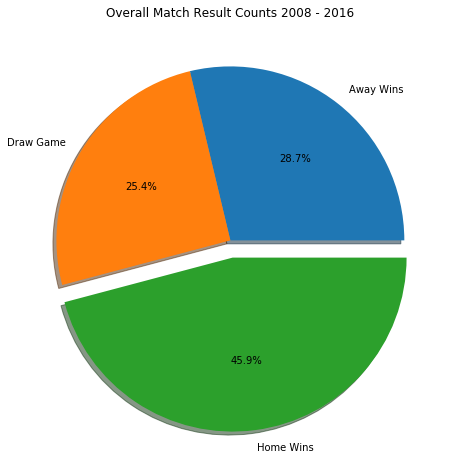

In [51]:
# https://datatofish.com/pie-chart-matplotlib/
# https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples
df_match.groupby(['match_result']).size().plot(kind='pie', figsize=(12,8), legend=False, title='Overall Match Result Counts 2008 - 2016', ylabel='', labels=['Away Wins', 'Draw Game', 'Home Wins'], autopct='%1.1f%%', explode=[0, 0, 0.1], shadow=True);

Looks like home advantage is applicable to soccer games, too. But since we wish to choose the best teams to bet (we are not going to bet on all home teams recklessly), we need some metrics that can be attached to the best teams to make our final decision. Next we will use histograms to show the overall distribution of match counts and result rates to get the idea about where the best teams situate themselves.

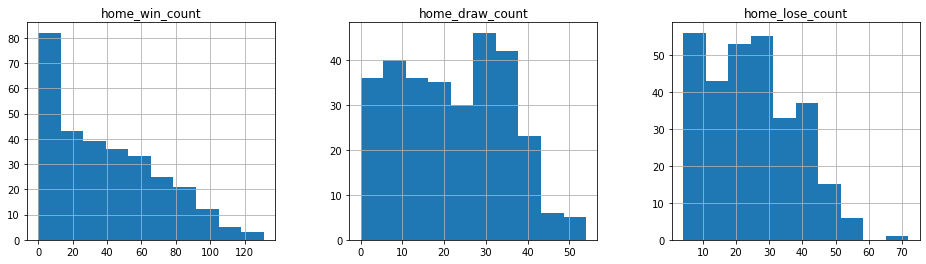

In [52]:
# Create histograms of home team match counts
df_match_count_home_total[['home_win_count', 'home_draw_count', 'home_lose_count']].hist(figsize=(16,4), layout=(1,3));

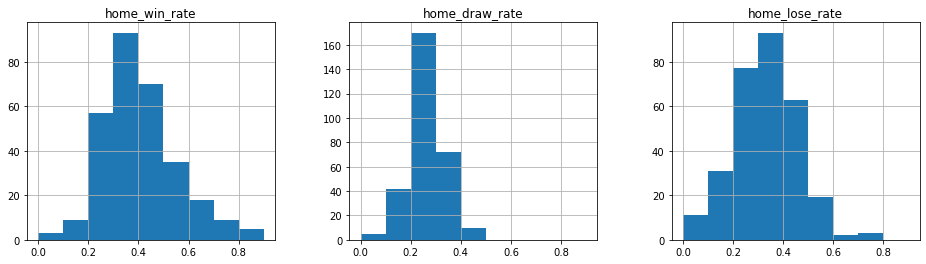

In [53]:
# Create histograms of home team match result rates
df_match_count_home_total[['home_win_rate', 'home_draw_rate', 'home_lose_rate']].hist(figsize=(16,4), layout=(1,3), bins=np.arange(0, 1, 0.1));

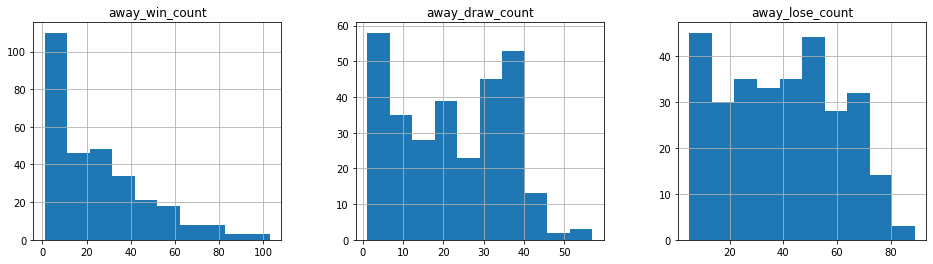

In [54]:
# Create histograms of away team match counts
df_match_count_away_total[['away_win_count', 'away_draw_count', 'away_lose_count']].hist(figsize=(16,4), layout=(1,3));

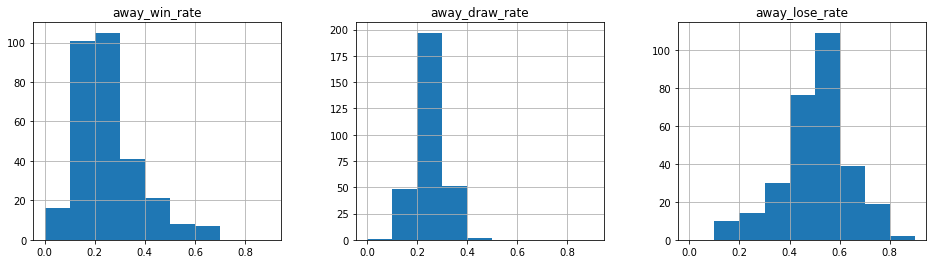

In [55]:
# Create histograms of away team match result rates
df_match_count_away_total[['away_win_rate', 'away_draw_rate', 'away_lose_rate']].hist(figsize=(16,4), layout=(1,3), bins=np.arange(0, 1, 0.1));

From the histograms above we can observe the following facts:

1. There are some soccer teams which earned more than 120 victories when played as *home* team, and more than 100 victories when played as *away* team; meanwhile, there are also some teams which accumulated more than 70 losses when played as *home* team, and more than 80 losses when played as *away* team.

2. There are two situations which a soccer team achieved an overall result rate over 80%, i.e.,
    * Overall **win** rate higher than 80% when played as *home* team
    * Overall **lose** rate higher than 80% when played as *away* team

For the former, that's an outstanding performance. And for the latter, that's an outstanding performance, too :) (at least from the perspective of gamblers, yes). The sad thing is, practically the teams with such a high lose rate will soon be demoted from leagues which we can place bets. This leaves us with only one choice on the table : bet on teams which achieved overall home win rates higher than 80%.

And, we can create a bar plot to help us visualize actual values of the highest game result rates. This should serve as a complement to plots we created earlier.

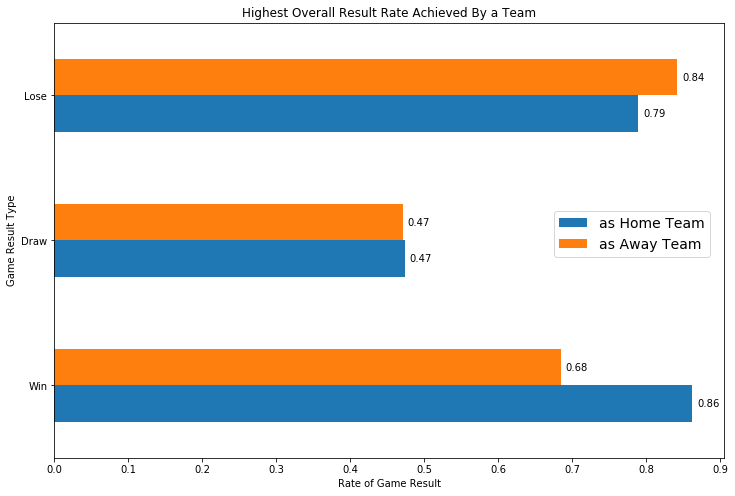

In [56]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html
home = [df_match_count_home_total.home_win_rate.max(), df_match_count_home_total.home_draw_rate.max(), df_match_count_home_total.home_lose_rate.max()]
away = [df_match_count_away_total.away_win_rate.max(), df_match_count_away_total.away_draw_rate.max(), df_match_count_away_total.away_lose_rate.max()]

df_barh = pd.DataFrame({'home': home, 'away': away}, index=['Win', 'Draw', 'Lose'])
plot_barh = df_barh.plot(kind="barh", figsize=(12,8))

plt.title("Highest Overall Result Rate Achieved By a Team")
plt.xlabel("Rate of Game Result")
plt.ylabel("Game Result Type")
plt.legend(['as Home Team', 'as Away Team'], loc='best', bbox_to_anchor=(1.0, 0.6), borderaxespad=1, fontsize=14)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(0, 1, 0.1), horizontalalignment="center", rotation=0)

# https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
# https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
# https://pystyle.info/matplotlib-add-text-on-axes/
for barh in plot_barh.patches:
    plt.annotate("%.2f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(5, 15), textcoords='offset points')

Surely even the team with the highest overall home win rate is not a sure bet, but it is still far better than coin toss probability (an illusion one tends to believe when placing bets on soccer games blindly). However, before we accept teams with overall home win rate higher than 80% as our candidates of wagers, let's do one more check on them. Certainly these teams demonstrated good overall performance, but are their performance metrics *reliable* enough throughout all seasons in the dataset? We will further investigate detailed match result metrics of each season for these teams.

To survey the seasonal performance of a team, a line plot would be a fitting choice for this task. We can create a line plot showing changes of seasonal result rates over seasons, and the trend would be revealed.

In [57]:
# Create a user-defined function to make it easier to draw line plots
# (we are going to call this function for all teams with their overall home_win_rate > 0.8)
def show_line_plot(x):
    df_match_count_home_season.query('home_team_api_id == {}'.format(x)).plot(x='season', y=['home_lose_rate', 'home_draw_rate', 'home_win_rate'], kind='line', color=['red', 'green', 'blue'], figsize=(12,8), yticks=(np.arange(0, 1, 0.1)), grid=True, title='Seasonal Home Match Result Rate of {}'.format(df_team.query('team_api_id == {}'.format(x)).team_long_name.tolist()[0]), xlabel='Seasons', ylabel='Rate of Game Result')
    plt.legend(['Lose Rate', 'Draw Rate', 'Win Rate'], loc='best', bbox_to_anchor=(1.0, 0.6), borderaxespad=1, fontsize=14)

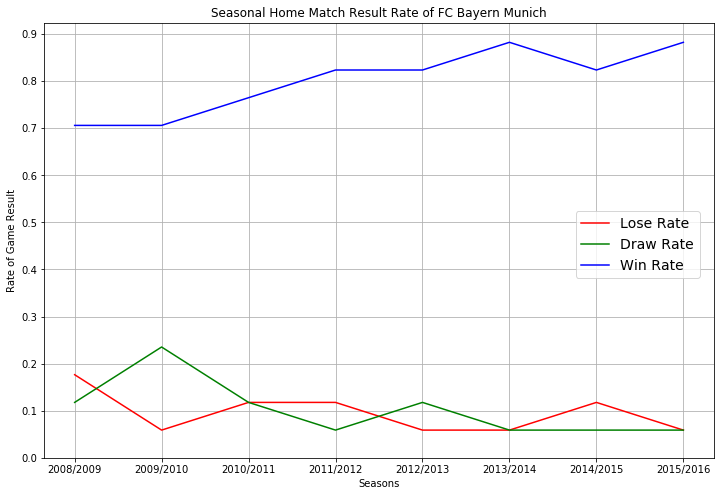

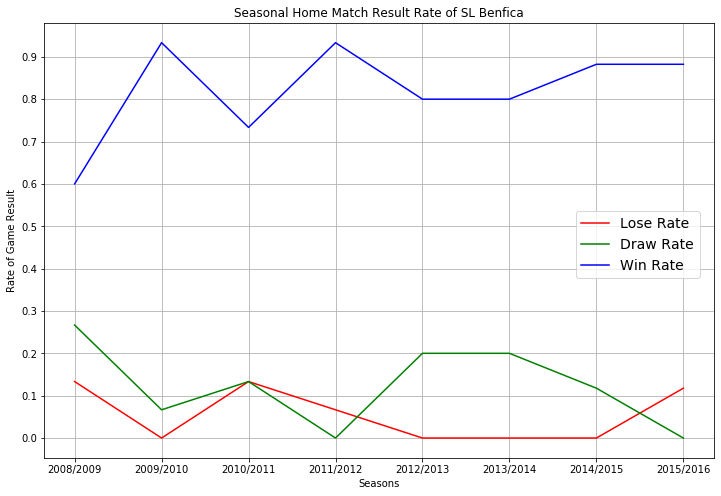

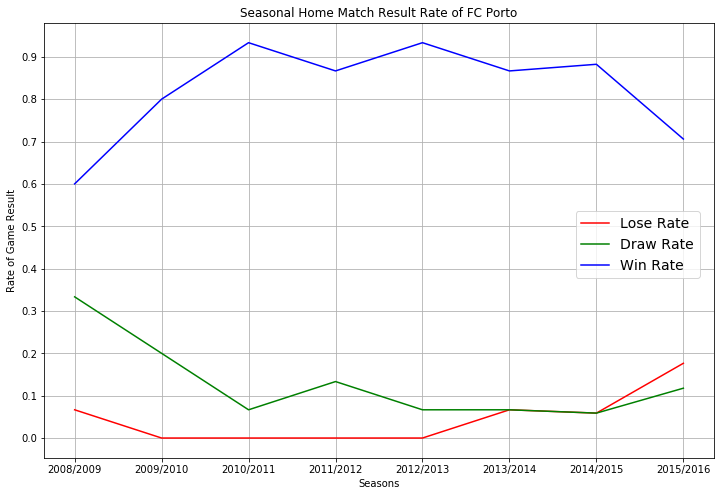

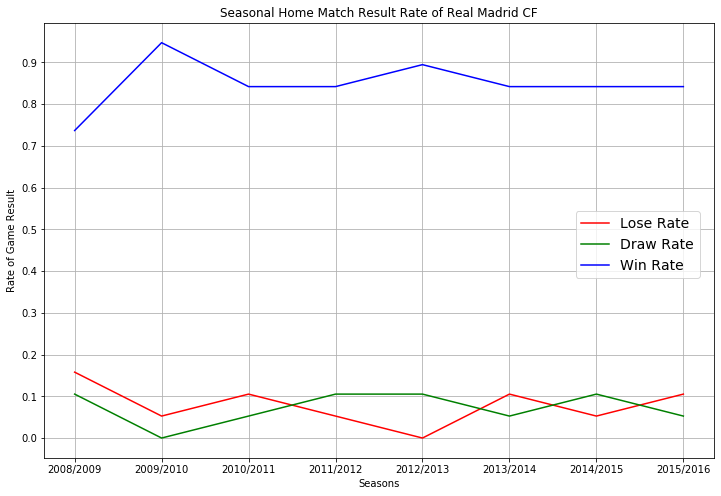

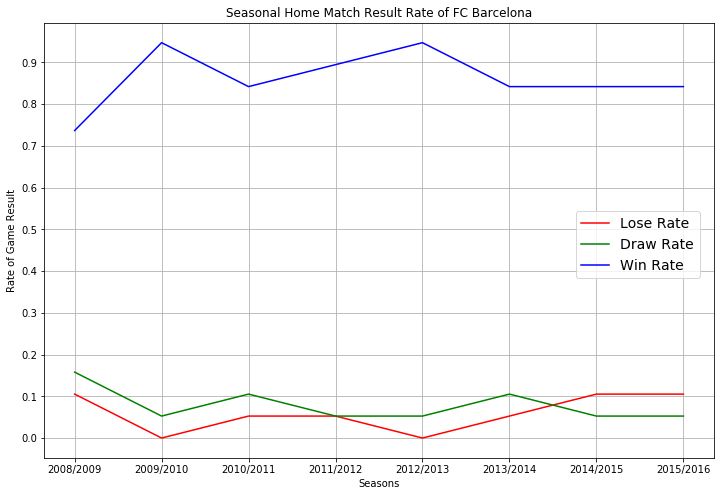

In [58]:
# Call the function to create line plots for all teams with their overall home_win_rate > 0.8)
for api_id in df_match_count_home_total.loc[df_match_count_home_total['home_win_rate'] > 0.8].home_team_api_id.tolist():
    show_line_plot(api_id)

To our surprise, FC Porto, one of the five teams in our candidate list, manifested the evidence of downswing because its seasonal home win rate has showed a sharp decline on season 2015/2016, even though its overall home win rate is a promising 82%.

With this piece of information surfaced, we can exclude this team from the list, leaving us with only four teams in consequence to contemplate bet placement:

* FC Bayern Munich
* SL Benfica
* Real Madrid CF
* FC Barcelona

Finally, following is the list of teams with their overall home win rates higher than 80% for reference.

In [59]:
# display teams with their overall home_win_rate higher than 80%
df_match_count_home_total.query('home_win_rate > 0.8 & team_long_name != "FC Porto"')

,league_id,league_name,home_team_api_id,team_long_name,team_short_name,home_lose_count,home_draw_count,home_win_count,home_lose_rate,home_draw_rate,home_win_rate
117,7809,Germany 1. Bundesliga,9823,FC Bayern Munich,BMU,13,14,109,0.095588,0.102941,0.801471
221,17642,Portugal Liga ZON Sagres,9772,SL Benfica,BEN,7,15,102,0.056452,0.120968,0.822581
267,21518,Spain LIGA BBVA,8633,Real Madrid CF,REA,12,11,129,0.078947,0.072368,0.848684
268,21518,Spain LIGA BBVA,8634,FC Barcelona,BAR,9,12,131,0.059211,0.078947,0.861842


<a id='conclusions'></a>
## Conclusions

Now it is apparent that the four teams were top performers when they played as home teams in soccer matches, we can confidently consider placing our bets on these teams and expect a win rate higher than 80%. Nevertheless, it is still not a sure bet, since our conclusion is based on the analysis of existing historical data; the past trend we perceived is just a possibility, anything could happen to these teams in forthcoming years not recorded in the dataset (eg. some of the teams may suffer the same slump like team FC Porto experienced, or something that's way over the imagination of the audience happened in the game like [this](https://www.cbssports.com/soccer/world-cup/news/world-cup-2018-first-red-card-goes-to-colombias-carlos-sanchez-for-doing-his-best-goalkeeper-impression-vs-japan/)). And remember unlike investments which you may receive dividends, gambles will only bring results to you, whether they are desired or unpleasant ones.

Only place bet when you really understand what you are doing. You have been warned.

<a id='appendices'></a>
## Appendices

Following is the list of bookmakers which had their betting odds listed in the [European Soccer Database](https://www.kaggle.com/hugomathien/soccer).

* [Bet365](https://www.bet365.com/)
* [Blue Square](https://www.betfair.com/sport/football/)
* Bet&Win (Cannot find its official website after Googling)
* [Gamebookers](https://sports.gamebookers.com/en/sports)
* [Interwetten](https://www.interwetten.com/en/sportsbook)
* [Ladbrokes](https://sports.ladbrokes.com/sport/football)
* [Pinnacle](https://www.pinnacle.com/)
* [Sporting Odds](http://www.sportingodds.com) (URL Redirect to [Sportingbet](https://sports.sportingbet.com/en/sports))
* [Sportingbet](https://sports.sportingbet.com/en/sports)
* [Stan James](https://www.unibet.co.uk/stan-james) (acquired by [Unibet](https://www.globenewswire.com/news-release/2015/07/10/751081/0/en/Unibet-acquires-Stan-James-Online.html))
* [Stanleybet](https://www.stanleybet.ro/en/sportsbook)
* [VC Bet](https://www.betvictor.com/)
* [William Hill](https://www.williamhill.com/)

Also, there's a website called [Odds Portal](https://www.oddsportal.com/) which provides services to monitor betting odds worldwide, and it is confirmed that partial of the NULL historical betting odds in the dataset can be found here, but if the bookmaker you are looking for is not listed on the company's website, then you are out of luck.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
# Udacity's project workspace has already configured a default value 'html' for option '--to'
# You may need to insert arguments '--to' and 'html' after 'nbconvert' when working in your custom environment
# Hint : this is actually a terminal CLI command invoking python shell to run designated library module
call(['python', '-m', 'nbconvert', '--to', 'html', 'Investigate_a_Dataset.ipynb'])

0